In [1]:
from ultralytics import YOLOv10
import numpy as np
import torch
import gc

# Correcting the deprecated usage of np.bool
np.bool = np.bool_

# Model configuration
id = "voc"
model_type = "v10l"
scratch = "" 
batch_size = 4  # You can reduce this if memory issues persist
img_size = 800  # You can also reduce this if necessary
ood_datasets = ["ID-voc-OOD-coco", "OOD-open"] if id == "voc" else ["ID-bdd-OOD-coco", "OOD-open", "voc-ood"]

/home/hugo/miniconda3/envs/yolov10/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# FX

In [2]:
for epoch in [50, 100, 150]:
    # Load the model once
    model = YOLOv10(f'/home/hugo/yolov10/models/v10l_voc/epoch{epoch}.engine', task="detect")

    # Validation on different splits
    for split in ["train", "val"]:
        model.val(
            data=f"/home/hugo/datasets/{id}/dataset.yaml", 
            batch=batch_size,
            imgsz=img_size,
            verbose=False,
            device="cuda",
            split=split, 
            save_json=True,
            project=f"/home/hugo/yolov10FX/feats/{model_type}_{id}_{epoch}",
            name=f"{id}-{split}"
        )
        torch.cuda.empty_cache()
        gc.collect()

    # Validation on out-of-domain datasets
    for dataset_name in ood_datasets:
        model.val(
            data=f"/home/hugo/datasets/{dataset_name}/dataset.yaml", 
            batch=batch_size,
            imgsz=img_size,
            verbose=False,
            device="cuda",
            save_json=True,
            project=f"/home/hugo/yolov10FX/feats/{model_type}_{id}_{epoch}",
            name=f"{dataset_name}"
        )
        torch.cuda.empty_cache()
        gc.collect()


Ultralytics YOLOv8.1.34 🚀 Python-3.9.19 torch-2.0.1+cu117 CUDA:0 (NVIDIA RTX A4000 Laptop GPU, 8192MiB)
Loading /home/hugo/yolov10/models/v10l_voc/epoch50.engine for TensorRT inference...
[06/25/2024-23:33:23] [TRT] [I] Loaded engine size: 96 MiB
[06/25/2024-23:33:23] [TRT] [I] [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +1027, GPU +34, now: CPU 1332, GPU 1203 (MiB)
[06/25/2024-23:33:24] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +218, GPU +32, now: CPU 1550, GPU 1235 (MiB)
[06/25/2024-23:33:24] [TRT] [W] TensorRT was linked against cuDNN 8.6.0 but loaded cuDNN 8.5.0
[06/25/2024-23:33:24] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +0, GPU +92, now: CPU 0, GPU 92 (MiB)
[06/25/2024-23:33:24] [TRT] [I] [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +0, GPU +32, now: CPU 1455, GPU 1203 (MiB)
[06/25/2024-23:33:24] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +32, now: CPU 1455, GPU 1235 (MiB)
[06/25/2024-23:33:24] [TRT] [W] TensorRT was linked aga

val: Scanning /home/hugo/datasets/voc/labels/train.cache... 16551 images, 1729 backgrounds, 0 corrupt: 100%|██████████| 16551/16551 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2069/2069 [06:24<00:00,  5.38it/s]


                   all      16551      39612      0.941      0.902      0.961      0.818
Speed: 0.3ms preprocess, 17.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Saving /home/hugo/yolov10FX/feats/v10l_voc_50/voc-train/predictions.json...
Results saved to /home/hugo/yolov10FX/feats/v10l_voc_50/voc-train
Ultralytics YOLOv8.1.34 🚀 Python-3.9.19 torch-2.0.1+cu117 CUDA:0 (NVIDIA RTX A4000 Laptop GPU, 8192MiB)
Loading /home/hugo/yolov10/models/v10l_voc/epoch50.engine for TensorRT inference...
[06/25/2024-23:42:03] [TRT] [I] Loaded engine size: 96 MiB
[06/25/2024-23:42:03] [TRT] [I] [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +0, GPU +34, now: CPU 3243, GPU 1839 (MiB)
[06/25/2024-23:42:03] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +1, GPU +32, now: CPU 3244, GPU 1871 (MiB)
[06/25/2024-23:42:03] [TRT] [W] TensorRT was linked against cuDNN 8.6.0 but loaded cuDNN 8.5.0
[06/25/2024-23:42:03] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +0, GPU +9

val: Scanning /home/hugo/datasets/voc/labels/val.cache... 4952 images, 487 backgrounds, 0 corrupt: 100%|██████████| 4952/4952 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 619/619 [01:51<00:00,  5.53it/s]


                   all       4952      12648      0.862      0.777      0.857      0.653
Speed: 0.3ms preprocess, 17.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Saving /home/hugo/yolov10FX/feats/v10l_voc_50/voc-val/predictions.json...
Results saved to /home/hugo/yolov10FX/feats/v10l_voc_50/voc-val
Ultralytics YOLOv8.1.34 🚀 Python-3.9.19 torch-2.0.1+cu117 CUDA:0 (NVIDIA RTX A4000 Laptop GPU, 8192MiB)
Loading /home/hugo/yolov10/models/v10l_voc/epoch50.engine for TensorRT inference...
[06/25/2024-23:45:24] [TRT] [I] Loaded engine size: 96 MiB
[06/25/2024-23:45:24] [TRT] [I] [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +0, GPU +34, now: CPU 3198, GPU 2003 (MiB)
[06/25/2024-23:45:24] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +32, now: CPU 3198, GPU 2035 (MiB)
[06/25/2024-23:45:24] [TRT] [W] TensorRT was linked against cuDNN 8.6.0 but loaded cuDNN 8.5.0
[06/25/2024-23:45:24] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +0, GPU +92, n

val: Scanning /home/hugo/datasets/ID-voc-OOD-coco/labels/val.cache... 0 images, 930 backgrounds, 0 corrupt: 100%|██████████| 930/930 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /home/hugo/datasets/ID-voc-OOD-coco/labels/val.cache, training may not work correctly. See https://docs.ultralytics.com/datasets/detect for dataset formatting guidance.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 117/117 [00:18<00:00,  6.20it/s]

                   all        930          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


Speed: 0.3ms preprocess, 17.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Saving /home/hugo/yolov10FX/feats/v10l_voc_50/ID-voc-OOD-coco/predictions.json...
Results saved to /home/hugo/yolov10FX/feats/v10l_voc_50/ID-voc-OOD-coco
Ultralytics YOLOv8.1.34 🚀 Python-3.9.19 torch-2.0.1+cu117 CUDA:0 (NVIDIA RTX A4000 Laptop GPU, 8192MiB)
Loading /home/hugo/yolov10/models/v10l_voc/epoch50.engine for TensorRT inference...
[06/25/2024-23:46:35] [TRT] [I] Loaded engine size: 96 MiB
[06/25/2024-23:46:35] [TRT] [I] [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +0, GPU +34, now: CPU 3175, GPU 1485 (MiB)
[06/25/2024-23:46:35] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +32, now: CPU 3175, GPU 1517 (MiB)
[06/25/2024-23:46:35] [TRT] [W] TensorRT was linked against cuDNN 8.6.0 but loaded cuDNN 8.5.0
[06/25/2024-23:46:35] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +0, GPU +92, now: CPU 0, GPU 92 (MiB)
[06/25/2024-23:46:35] [TRT] [I] [MemUsageChange] 

val: Scanning /home/hugo/datasets/OOD-open/labels/val.cache... 0 images, 1852 backgrounds, 0 corrupt: 100%|██████████| 1852/1852 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /home/hugo/datasets/OOD-open/labels/val.cache, training may not work correctly. See https://docs.ultralytics.com/datasets/detect for dataset formatting guidance.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 232/232 [00:39<00:00,  5.95it/s]

                   all       1852          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


Speed: 0.3ms preprocess, 18.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Saving /home/hugo/yolov10FX/feats/v10l_voc_50/OOD-open/predictions.json...
Results saved to /home/hugo/yolov10FX/feats/v10l_voc_50/OOD-open
Ultralytics YOLOv8.1.34 🚀 Python-3.9.19 torch-2.0.1+cu117 CUDA:0 (NVIDIA RTX A4000 Laptop GPU, 8192MiB)
Loading /home/hugo/yolov10/models/v10l_voc/epoch100.engine for TensorRT inference...
[06/25/2024-23:48:10] [TRT] [I] Loaded engine size: 96 MiB
[06/25/2024-23:48:10] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +34, now: CPU 3178, GPU 1381 (MiB)
[06/25/2024-23:48:10] [TRT] [W] TensorRT was linked against cuDNN 8.6.0 but loaded cuDNN 8.5.0
[06/25/2024-23:48:10] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +0, GPU +92, now: CPU 0, GPU 92 (MiB)
[06/25/2024-23:48:10] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +32, now: CPU 3082, GPU 1381 (MiB)
[06/25/2024-23:48:10] [TRT] [W] TensorRT was linked against cuDNN 8.6.0 

val: Scanning /home/hugo/datasets/voc/labels/train.cache... 16551 images, 1729 backgrounds, 0 corrupt: 100%|██████████| 16551/16551 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2069/2069 [06:52<00:00,  5.01it/s]


                   all      16551      39612      0.955      0.942       0.98      0.856
Speed: 0.3ms preprocess, 17.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Saving /home/hugo/yolov10FX/feats/v10l_voc_100/voc-train/predictions.json...
Results saved to /home/hugo/yolov10FX/feats/v10l_voc_100/voc-train
Ultralytics YOLOv8.1.34 🚀 Python-3.9.19 torch-2.0.1+cu117 CUDA:0 (NVIDIA RTX A4000 Laptop GPU, 8192MiB)
Loading /home/hugo/yolov10/models/v10l_voc/epoch100.engine for TensorRT inference...
[06/25/2024-23:57:00] [TRT] [I] Loaded engine size: 96 MiB
[06/25/2024-23:57:00] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +34, now: CPU 3250, GPU 1839 (MiB)
[06/25/2024-23:57:00] [TRT] [W] TensorRT was linked against cuDNN 8.6.0 but loaded cuDNN 8.5.0
[06/25/2024-23:57:00] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +0, GPU +92, now: CPU 0, GPU 92 (MiB)
[06/25/2024-23:57:00] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +32, now: CPU 

val: Scanning /home/hugo/datasets/voc/labels/val.cache... 4952 images, 487 backgrounds, 0 corrupt: 100%|██████████| 4952/4952 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 619/619 [01:51<00:00,  5.57it/s]


                   all       4952      12648      0.864      0.799      0.868      0.667
Speed: 0.3ms preprocess, 17.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Saving /home/hugo/yolov10FX/feats/v10l_voc_100/voc-val/predictions.json...
Results saved to /home/hugo/yolov10FX/feats/v10l_voc_100/voc-val
Ultralytics YOLOv8.1.34 🚀 Python-3.9.19 torch-2.0.1+cu117 CUDA:0 (NVIDIA RTX A4000 Laptop GPU, 8192MiB)
Loading /home/hugo/yolov10/models/v10l_voc/epoch100.engine for TensorRT inference...
[06/26/2024-00:00:21] [TRT] [I] Loaded engine size: 96 MiB
[06/26/2024-00:00:21] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +34, now: CPU 3198, GPU 2003 (MiB)
[06/26/2024-00:00:21] [TRT] [W] TensorRT was linked against cuDNN 8.6.0 but loaded cuDNN 8.5.0
[06/26/2024-00:00:21] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +0, GPU +92, now: CPU 0, GPU 92 (MiB)
[06/26/2024-00:00:21] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +32, now: CPU 3102

val: Scanning /home/hugo/datasets/ID-voc-OOD-coco/labels/val.cache... 0 images, 930 backgrounds, 0 corrupt: 100%|██████████| 930/930 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /home/hugo/datasets/ID-voc-OOD-coco/labels/val.cache, training may not work correctly. See https://docs.ultralytics.com/datasets/detect for dataset formatting guidance.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 117/117 [00:18<00:00,  6.17it/s]

                   all        930          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


Speed: 0.3ms preprocess, 17.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Saving /home/hugo/yolov10FX/feats/v10l_voc_100/ID-voc-OOD-coco/predictions.json...
Results saved to /home/hugo/yolov10FX/feats/v10l_voc_100/ID-voc-OOD-coco
Ultralytics YOLOv8.1.34 🚀 Python-3.9.19 torch-2.0.1+cu117 CUDA:0 (NVIDIA RTX A4000 Laptop GPU, 8192MiB)
Loading /home/hugo/yolov10/models/v10l_voc/epoch100.engine for TensorRT inference...
[06/26/2024-00:01:32] [TRT] [I] Loaded engine size: 96 MiB
[06/26/2024-00:01:32] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +34, now: CPU 3175, GPU 1485 (MiB)
[06/26/2024-00:01:32] [TRT] [W] TensorRT was linked against cuDNN 8.6.0 but loaded cuDNN 8.5.0
[06/26/2024-00:01:32] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +0, GPU +92, now: CPU 0, GPU 92 (MiB)
[06/26/2024-00:01:32] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +1, GPU +32, now: CPU 3080, GPU 1485 (MiB)
[06/26/2024-00:01:32] [TRT] [W] TensorRT was linked agai

val: Scanning /home/hugo/datasets/OOD-open/labels/val.cache... 0 images, 1852 backgrounds, 0 corrupt: 100%|██████████| 1852/1852 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /home/hugo/datasets/OOD-open/labels/val.cache, training may not work correctly. See https://docs.ultralytics.com/datasets/detect for dataset formatting guidance.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 232/232 [00:38<00:00,  5.95it/s]

                   all       1852          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


Speed: 0.3ms preprocess, 18.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Saving /home/hugo/yolov10FX/feats/v10l_voc_100/OOD-open/predictions.json...
Results saved to /home/hugo/yolov10FX/feats/v10l_voc_100/OOD-open
Ultralytics YOLOv8.1.34 🚀 Python-3.9.19 torch-2.0.1+cu117 CUDA:0 (NVIDIA RTX A4000 Laptop GPU, 8192MiB)
Loading /home/hugo/yolov10/models/v10l_voc/epoch150.engine for TensorRT inference...
[06/26/2024-00:03:07] [TRT] [I] Loaded engine size: 96 MiB
[06/26/2024-00:03:07] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +34, now: CPU 3178, GPU 1381 (MiB)
[06/26/2024-00:03:07] [TRT] [W] TensorRT was linked against cuDNN 8.6.0 but loaded cuDNN 8.5.0
[06/26/2024-00:03:07] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +0, GPU +92, now: CPU 0, GPU 92 (MiB)
[06/26/2024-00:03:07] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +1, GPU +32, now: CPU 3083, GPU 1381 (MiB)
[06/26/2024-00:03:07] [TRT] [W] TensorRT was linked against cuDNN 8.6.

val: Scanning /home/hugo/datasets/voc/labels/train.cache... 16551 images, 1729 backgrounds, 0 corrupt: 100%|██████████| 16551/16551 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2069/2069 [06:51<00:00,  5.03it/s]


                   all      16551      39612      0.936      0.946      0.983      0.872
Speed: 0.3ms preprocess, 17.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Saving /home/hugo/yolov10FX/feats/v10l_voc_150/voc-train/predictions.json...
Results saved to /home/hugo/yolov10FX/feats/v10l_voc_150/voc-train
Ultralytics YOLOv8.1.34 🚀 Python-3.9.19 torch-2.0.1+cu117 CUDA:0 (NVIDIA RTX A4000 Laptop GPU, 8192MiB)
Loading /home/hugo/yolov10/models/v10l_voc/epoch150.engine for TensorRT inference...
[06/26/2024-00:11:53] [TRT] [I] Loaded engine size: 96 MiB
[06/26/2024-00:11:53] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +34, now: CPU 3250, GPU 1839 (MiB)
[06/26/2024-00:11:53] [TRT] [W] TensorRT was linked against cuDNN 8.6.0 but loaded cuDNN 8.5.0
[06/26/2024-00:11:53] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +0, GPU +92, now: CPU 0, GPU 92 (MiB)
[06/26/2024-00:11:53] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +32, now: CPU 

val: Scanning /home/hugo/datasets/voc/labels/val.cache... 4952 images, 487 backgrounds, 0 corrupt: 100%|██████████| 4952/4952 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 619/619 [01:50<00:00,  5.58it/s]


                   all       4952      12648      0.822      0.797      0.856      0.655
Speed: 0.3ms preprocess, 17.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Saving /home/hugo/yolov10FX/feats/v10l_voc_150/voc-val/predictions.json...
Results saved to /home/hugo/yolov10FX/feats/v10l_voc_150/voc-val
Ultralytics YOLOv8.1.34 🚀 Python-3.9.19 torch-2.0.1+cu117 CUDA:0 (NVIDIA RTX A4000 Laptop GPU, 8192MiB)
Loading /home/hugo/yolov10/models/v10l_voc/epoch150.engine for TensorRT inference...
[06/26/2024-00:15:12] [TRT] [I] Loaded engine size: 96 MiB
[06/26/2024-00:15:12] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +34, now: CPU 3198, GPU 2003 (MiB)
[06/26/2024-00:15:12] [TRT] [W] TensorRT was linked against cuDNN 8.6.0 but loaded cuDNN 8.5.0
[06/26/2024-00:15:12] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +0, GPU +92, now: CPU 0, GPU 92 (MiB)
[06/26/2024-00:15:12] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +32, now: CPU 3102

val: Scanning /home/hugo/datasets/ID-voc-OOD-coco/labels/val.cache... 0 images, 930 backgrounds, 0 corrupt: 100%|██████████| 930/930 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /home/hugo/datasets/ID-voc-OOD-coco/labels/val.cache, training may not work correctly. See https://docs.ultralytics.com/datasets/detect for dataset formatting guidance.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 117/117 [00:18<00:00,  6.17it/s]

                   all        930          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


Speed: 0.3ms preprocess, 17.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Saving /home/hugo/yolov10FX/feats/v10l_voc_150/ID-voc-OOD-coco/predictions.json...
Results saved to /home/hugo/yolov10FX/feats/v10l_voc_150/ID-voc-OOD-coco
Ultralytics YOLOv8.1.34 🚀 Python-3.9.19 torch-2.0.1+cu117 CUDA:0 (NVIDIA RTX A4000 Laptop GPU, 8192MiB)
Loading /home/hugo/yolov10/models/v10l_voc/epoch150.engine for TensorRT inference...
[06/26/2024-00:16:22] [TRT] [I] Loaded engine size: 96 MiB
[06/26/2024-00:16:22] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +34, now: CPU 3175, GPU 1485 (MiB)
[06/26/2024-00:16:22] [TRT] [W] TensorRT was linked against cuDNN 8.6.0 but loaded cuDNN 8.5.0
[06/26/2024-00:16:22] [TRT] [I] [MemUsageChange] TensorRT-managed allocation in engine deserialization: CPU +0, GPU +92, now: CPU 0, GPU 92 (MiB)
[06/26/2024-00:16:22] [TRT] [I] [MemUsageChange] Init cuDNN: CPU +0, GPU +32, now: CPU 3080, GPU 1485 (MiB)
[06/26/2024-00:16:22] [TRT] [W] TensorRT was linked agai

val: Scanning /home/hugo/datasets/OOD-open/labels/val.cache... 0 images, 1852 backgrounds, 0 corrupt: 100%|██████████| 1852/1852 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /home/hugo/datasets/OOD-open/labels/val.cache, training may not work correctly. See https://docs.ultralytics.com/datasets/detect for dataset formatting guidance.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 232/232 [00:39<00:00,  5.93it/s]

                   all       1852          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


Speed: 0.3ms preprocess, 18.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Saving /home/hugo/yolov10FX/feats/v10l_voc_150/OOD-open/predictions.json...
Results saved to /home/hugo/yolov10FX/feats/v10l_voc_150/OOD-open


# Predictions preprocess

In [3]:
import numpy as np
import ijson

def json2npy(model_type, id, threshold, epoch, dataset_name):
    file_path = f"/home/hugo/yolov10FX/feats/{model_type}_{id}_{epoch}/{dataset_name}/predictions.json"
    
    logits = []
    labels = []

    # Use ijson to parse the JSON file incrementally
    with open(file_path, 'r') as f:
        objects = ijson.items(f, 'item')
        for obj in objects:
            if obj["score"] > threshold:
                logits.append(obj["logits"])
                labels.append(obj["category_id"])

    # Convert lists to NumPy arrays once at the end
    logits = np.array(logits, dtype=np.float32)
    labels = np.array(labels, dtype=np.int32)



    # Save the arrays to disk
    np.save(f"/home/hugo/yolov10FX/feats/{model_type}_{id}_{epoch}/{dataset_name}/logits.npy", logits)
    np.save(f"/home/hugo/yolov10FX/feats/{model_type}_{id}_{epoch}/{dataset_name}/labels.npy", labels)


In [ ]:
import numpy as np
import ijson

def json2npy(model_type, id, threshold, dataset_name):
    file_path = f"/home/hugo/yolov10FX/feats/{model_type}_{id}{scratch}/{dataset_name}/predictions.json"
    
    logits = []
    labels = []

    # Use ijson to parse the JSON file incrementally
    with open(file_path, 'r') as f:
        objects = ijson.items(f, 'item')
        for obj in objects:
            if obj["score"] > threshold:
                logits.append(obj["logits"])
                labels.append(obj["category_id"])

    # Convert lists to NumPy arrays once at the end
    logits = np.array(logits, dtype=np.float32)
    labels = np.array(labels, dtype=np.int32)



    # Save the arrays to disk
    np.save(f"/home/hugo/yolov10FX/feats/{model_type}_{id}{scratch}/{dataset_name}/logits.npy", logits)
    np.save(f"/home/hugo/yolov10FX/feats/{model_type}_{id}{scratch}/{dataset_name}/labels.npy", labels)


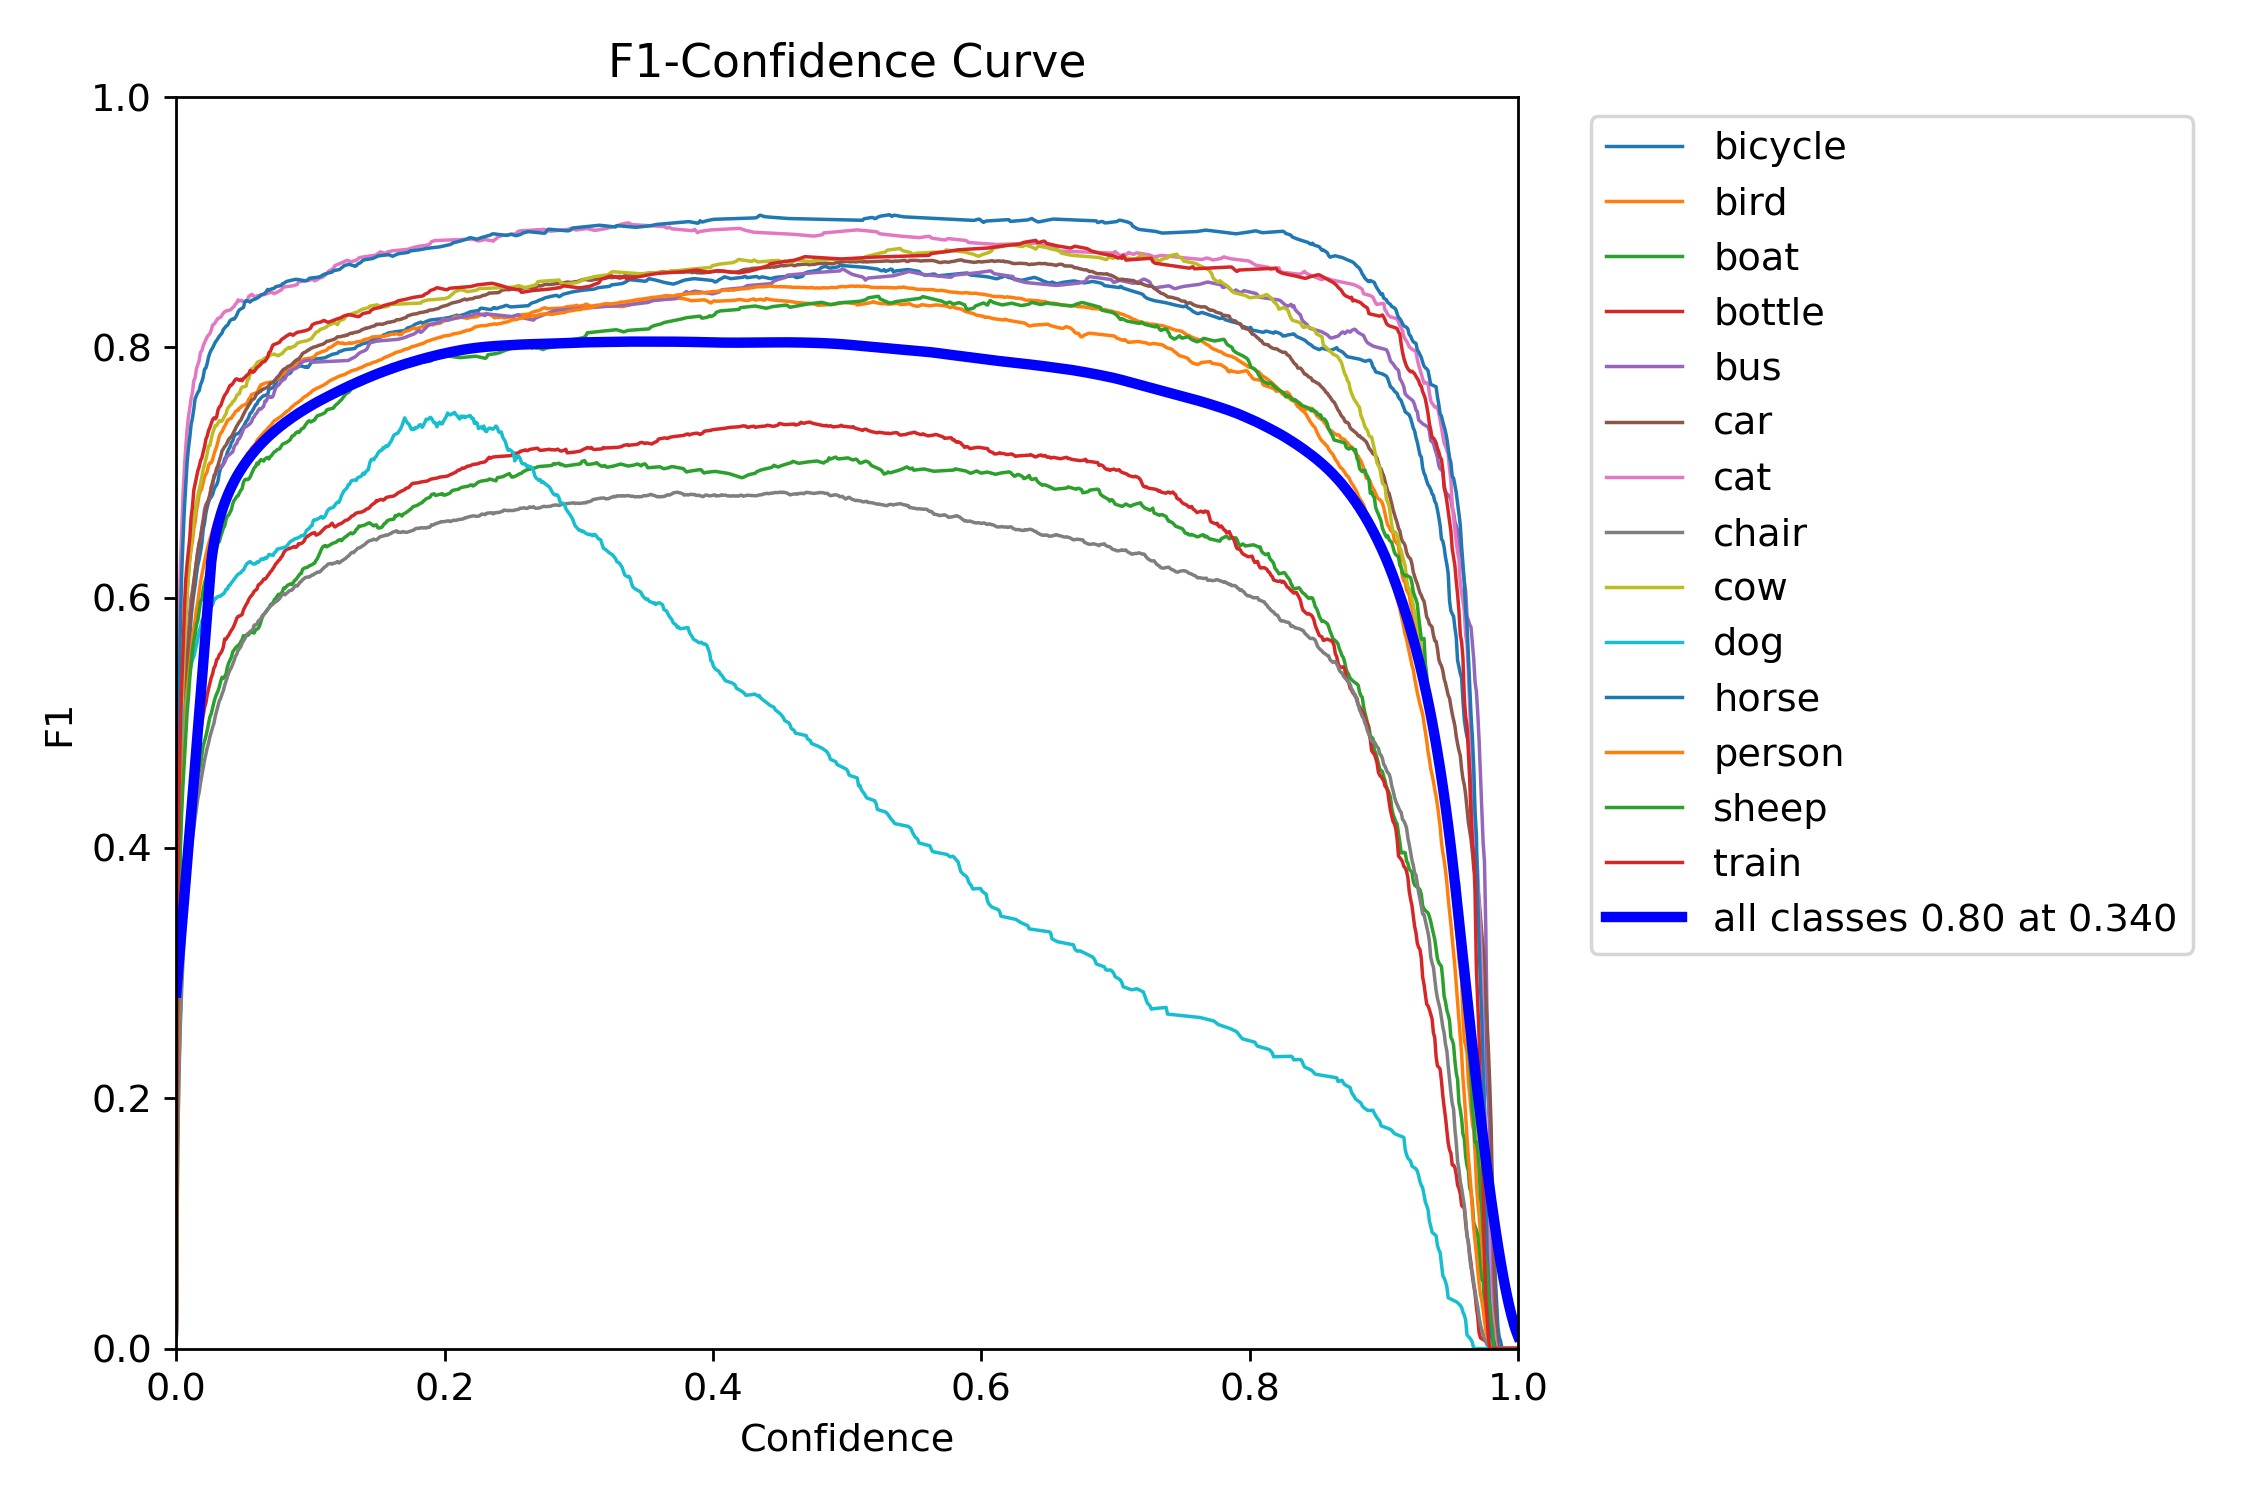

In [9]:
from IPython.display import Image
epoch = 150
Image(filename=f'/home/hugo/yolov10FX/feats/{model_type}_{id}_{epoch}/{id}-val/F1_curve.png')

In [10]:
import tqdm
for dataset_name in tqdm.tqdm(["voc-train", "voc-val"] + ood_datasets):
    json2npy(model_type, id, 0.34, epoch, dataset_name)

100%|██████████| 4/4 [00:56<00:00, 14.11s/it]


In [ ]:
import tqdm
for dataset_name in tqdm.tqdm(ood_datasets):
    json2npy(model_type, id, 0.498, dataset_name)

100%|██████████| 3/3 [00:08<00:00,  2.84s/it]


# Evaluation with scoring function

In [2]:
import torch 
import numpy as np
# build msp method (pass in pre-saved logits)
def msp_postprocess(logits):
    score = torch.softmax(logits, dim=1)
    conf, pred = torch.max(score, dim=1)
    return pred, conf
def ebo_postprocess(logits, temperature=1):
    score = torch.softmax(logits, dim=1)
    _, pred = torch.max(score, dim=1)
    conf = temperature * torch.logsumexp(logits / temperature,
                                                dim=1)
    return pred, conf
def maxlogits_postprocess(logits):
    conf, pred = torch.max(logits, dim=1)
    return pred, conf
import numpy as np
import torch
import sklearn.covariance

def mahalanobis_compute_mean(logits):
    num_classes = logits[0].shape[0]
    all_preds = np.array([logit.argmax(0) for logit in logits])
    all_preds = torch.from_numpy(all_preds)
    all_labels = all_preds
    all_feats = torch.from_numpy(logits)
    class_mean = []
    centered_data = []
    for c in range(num_classes):
        class_samples = all_feats[all_labels.eq(c)].data
        if class_samples.size(0) > 0:  # Check if there are samples for the class
            mean = class_samples.mean(0)
            centered = class_samples - mean.view(1, -1)
        else:  # If no samples, use a placeholder (e.g., zeros)
            feat_dim = all_feats.size(1)
            mean = torch.zeros(feat_dim)
            centered = torch.empty((0, feat_dim))  # Empty tensor with the correct second dimension
        class_mean.append(mean)
        centered_data.append(centered)

    # Ensure there's at least one class with samples to avoid errors in covariance calculation
    if len(torch.cat(centered_data)) == 0:
        raise ValueError("No samples available for any class to compute covariance.")
    
    group_lasso = sklearn.covariance.EmpiricalCovariance(assume_centered=False)
    group_lasso.fit(torch.cat(centered_data).cpu().numpy().astype(np.float32))
    precision = torch.from_numpy(group_lasso.precision_).float()
    return class_mean, precision

def mahalanobis_postprocess(logits, class_mean, precision):
    num_classes = logits[0].shape[0]
    pred = logits.argmax(1)
    precision = precision.double()
    class_scores = torch.zeros((logits.shape[0], num_classes))
    for c in range(num_classes):
        if class_mean[c].numel() > 0:  # Check if the class mean was computed
            # Efficient computation of Mahalanobis distance for each sample
            for i in range(logits.shape[0]):
                tensor = logits[i] - class_mean[c].double()
                # Here, we avoid the large matrix multiplication and directly compute the distance
                score = torch.dot(tensor, torch.matmul(precision, tensor))
                class_scores[i, c] = -score  # Negative score to match the original logic

    conf = torch.max(class_scores, dim=1)[0]
    return pred, conf

In [3]:
import numpy as np
import json
import torch
import gc
from openood.evaluators.metrics import compute_all_metrics

def process_and_evaluate(id, postprocess_method, dataset_names, modes=['train', 'val']):
    results = dict()
    results['id'] = dict()

    # Load and process ID data
    for mode in modes:
        results['id'][mode] = dict()
        logits_path = f"/home/hugo/yolov10FX/feats/{model_type}_{id}{scratch}/{id}-{mode}/logits.npy"
        labels_path = f"/home/hugo/yolov10FX/feats/{model_type}_{id}{scratch}/{id}-{mode}/labels.npy"
        results['id'][mode]['logits'] = np.load(logits_path, mmap_mode='r')
        results['id'][mode]['labels'] = np.load(labels_path, mmap_mode='r')

    results['ood'] = dict()

    # Load and process OOD data
    for dataset_name in dataset_names:
        results['ood'][dataset_name] = dict()
        logits_path = f'/home/hugo/yolov10FX/feats/{model_type}_{id}{scratch}/{dataset_name}/logits.npy'
        results['ood'][dataset_name]['logits'] = np.load(logits_path, mmap_mode='r')
        results['ood'][dataset_name]['labels'] = np.full((results['ood'][dataset_name]['logits'].shape[0], ), -1)

    postprocess_results = dict()
    postprocess_results['id'] = dict()

    if postprocess_method == mahalanobis_postprocess:
        class_mean, precision = mahalanobis_compute_mean(results['id']['train']['logits'])
        del results['id']['train']
        torch.cuda.empty_cache()
        gc.collect()
        pred, conf = postprocess_method(torch.from_numpy(results['id']['val']['logits']), class_mean, precision)
    else:
        pred, conf = postprocess_method(torch.from_numpy(results['id']['val']['logits']))

    pred, conf = pred.numpy(), conf.numpy()
    pred = np.full((pred.shape[0], ), 1)
    gt = pred
    postprocess_results['id']['val'] = [pred, conf, gt]

    del results['id']
    torch.cuda.empty_cache()
    gc.collect()

    postprocess_results['ood'] = dict()

    for dataset_name in dataset_names:
        if postprocess_method == mahalanobis_postprocess:
            pred, conf = postprocess_method(torch.from_numpy(results['ood'][dataset_name]['logits']), class_mean, precision)
        else:
            pred, conf = postprocess_method(torch.from_numpy(results['ood'][dataset_name]['logits']))

        pred, conf = pred.numpy(), conf.numpy()
        pred = np.full((pred.shape[0], ), -1)
        gt = pred
        postprocess_results['ood'][dataset_name] = [pred, conf, gt]

        del results['ood'][dataset_name]
        torch.cuda.empty_cache()
        gc.collect()

    return eval_ood(postprocess_results, dataset_names)

def eval_ood(postprocess_results, dataset_names):
    [id_pred, id_conf, id_gt] = postprocess_results['id']['val']
    metrics_list = []
    fpr95 = []
    auroc = []

    for dataset_name in dataset_names:
        [ood_pred, ood_conf, ood_gt] = postprocess_results['ood'][dataset_name]

        pred = np.concatenate([id_pred, ood_pred])
        conf = np.concatenate([id_conf, ood_conf])
        label = np.concatenate([id_gt, ood_gt])

        ood_metrics = compute_all_metrics(conf, label, pred)
        fpr95.append(ood_metrics[0])
        auroc.append(ood_metrics[1])
        metrics_list.append(ood_metrics)

    metrics_list = np.array(metrics_list)
    metrics_mean = np.mean(metrics_list, axis=0)
    fpr95.append(metrics_mean[0])
    auroc.append(metrics_mean[1])

    # return [round(fpr, 4) for fpr in fpr95], [round(auc, 4) for auc in auroc]
    return [round(auc*100, 2) for auc in auroc]


In [ ]:
postprocess_dict = {"msp": msp_postprocess, "ebo": ebo_postprocess, "mls": maxlogits_postprocess, "mds": mahalanobis_postprocess}
id, model_type, scratch = "bdd", "v10s", ""
ood_datasets = ["ID-voc-OOD-coco", "OOD-open"] if id == "voc" else ["ID-bdd-OOD-coco", "OOD-open", "voc-ood"]
print(f"evaluation on {id}-{model_type}{scratch} model")
for k,v in postprocess_dict.items():
    print(f"evalution using {k}")
    print(process_and_evaluate(id, v, dataset_names=ood_datasets))

evaluation on bdd-v10s model
evalution using msp
[77.05, 78.03, 76.03, 77.04]
evalution using ebo
[69.53, 70.11, 69.06, 69.57]
evalution using mls
[70.19, 70.96, 69.48, 70.21]
evalution using mds
[84.66, 84.3, 79.31, 82.76]


# Evaluation with BM

In [4]:
import numpy as np
import pickle
import tqdm
from utils.monitor_construction import features_clustering_by_k_start, monitor_construction_from_features
from utils.evaluation import get_distance_dataset, compute_fpr95, get_distance_cls

def load_pkl(file_path):
    with open(file_path, 'rb') as f:
        pkl_file = pickle.load(f)
    return pkl_file

def save_pkl(file_path, pkl_file):
    with open(file_path, 'wb') as f:
        pickle.dump(pkl_file, f)

def npy2feats_dict(model_type, id, dataset_name):
    logits = np.load(f"/home/hugo/yolov10FX/feats/{model_type}_{id}{scratch}/{dataset_name}/logits.npy")
    labels = np.load(f"/home/hugo/yolov10FX/feats/{model_type}_{id}{scratch}/{dataset_name}/labels.npy")
    feats_dict = dict()
    for i in range(len(logits)):
        label = labels[i]
        if label not in feats_dict:
            feats_dict[label] = []
        feats_dict[label].append(logits[i])
    for k,v in feats_dict.items():
        feats_dict[k] = np.array(v)
    return feats_dict

import numpy as np
from sklearn.metrics import roc_curve, auc

def compute_ood_metrics(scores, labels):
    # Ensure labels are binary (0 for OOD, 1 for ID)
    binary_labels = (labels == 1).astype(int)
    
    # Compute ROC curve points
    fpr, tpr, thresholds = roc_curve(binary_labels, scores)
    
    # Compute AUROC
    auroc = auc(fpr, tpr)
    
    # If AUROC < 0.5, invert the scores and recompute
    if auroc < 0.5:
        fpr, tpr, thresholds = roc_curve(binary_labels, -scores)
        auroc = auc(fpr, tpr)
    
    # Compute FPR95
    idx_tpr_95 = np.argmin(np.abs(tpr - 0.95))
    fpr95 = fpr[idx_tpr_95]
    
    return fpr95, auroc

def compute_fpr95(id, monitor_dict, model_type, distances_id, datasets):
    fpr95_list = []
    auroc_list = []
    ood_counts = []
    for dataset_name in datasets:
        feats_ood = npy2feats_dict(model_type, id, dataset_name)
        distances_dict = get_distance_dataset(monitor_dict, feats_ood)
        distances_ood = [distance for k, v in distances_dict.items() for distance in v]
        scores = np.concatenate([distances_id, distances_ood])*-1
        labels = np.concatenate([np.ones(len(distances_id)), np.zeros(len(distances_ood))])
        fpr95, auroc = compute_ood_metrics(scores, labels)
        fpr95_list.append(fpr95)
        auroc_list.append(auroc)
        ood_counts.append(len(distances_ood))
    mean_fpr95 = round(sum(fpr95_list) / len(fpr95_list), 2)
    fpr95_list.append(mean_fpr95)
    mean_auroc = round(sum(auroc_list) / len(auroc_list), 2)
    auroc_list.append(mean_auroc)
    return fpr95_list, auroc_list, ood_counts

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [5]:

def main(id, density, model_type):
    ood_datasets = ["ID-voc-OOD-coco", "OOD-open"] if id == "voc" else ["ID-bdd-OOD-coco", "OOD-open", "voc-ood"]
    monitor_dict = {}
    feats_dict = npy2feats_dict(model_type, id, f"{id}-train")
    for k, v in tqdm.tqdm(feats_dict.items(), desc="category loop", leave=False):
        if len(v) < density:
            continue
        k_start = round(len(v)/density)
        clustering_results = features_clustering_by_k_start(v, k_start)
        monitor_dict[k] = monitor_construction_from_features(v, clustering_results)
    feats_id = npy2feats_dict(model_type, id, f"{id}-val")
    distances_dict = get_distance_dataset(monitor_dict, feats_id)
    distances_id = [distance for k, v in distances_dict.items() for distance in v]
    
    fpr95_list = []
    auroc_list = []
    ood_counts = []
    for dataset_name in ood_datasets:
        feats_ood = npy2feats_dict(model_type, id, dataset_name)
        distances_dict = get_distance_dataset(monitor_dict, feats_ood)
        distances_ood = [distance for k, v in distances_dict.items() for distance in v]
        scores = np.concatenate([distances_id, distances_ood])*-1
        labels = np.concatenate([np.ones(len(distances_id)), np.zeros(len(distances_ood))])
        fpr95, auroc = compute_ood_metrics(scores, labels)
        fpr95_list.append(round(fpr95*100,2))
        auroc_list.append(round(auroc*100,2))
        ood_counts.append(len(distances_ood))
    mean_fpr95 = round(sum(fpr95_list) / len(fpr95_list), 2)
    fpr95_list.append(mean_fpr95)
    mean_auroc = round(sum(auroc_list) / len(auroc_list), 2)
    auroc_list.append(mean_auroc)
    return fpr95_list, auroc_list, ood_counts

In [ ]:
main(id, 50, model_type)

([56.33, 48.07, 60.98, 55.13], [76.64, 80.12, 72.56, 76.44], [1248, 880, 1448])

In [ ]:
postprocess_dict = {"msp": msp_postprocess, "ebo": ebo_postprocess, "mls": maxlogits_postprocess, "mds": mahalanobis_postprocess}
id, scratch = "bdd", ""
ood_datasets = ["ID-voc-OOD-coco", "OOD-open"] if id == "voc" else ["ID-bdd-OOD-coco", "OOD-open", "voc-ood"]
for model_type in ["v10s", "v10m", "v10l"]:
    print(f"evaluation on {id}-{model_type}{scratch} model")
    for k,v in postprocess_dict.items():
        print(f"evalution using {k}")
        print(process_and_evaluate(id, v, dataset_names=ood_datasets))
    main(id, 50, model_type)

AUROC: 0.882
FPR95: 0.448
Score range: -25.513 to -0.000
Number of ID samples: 11333
Number of OOD samples: 560


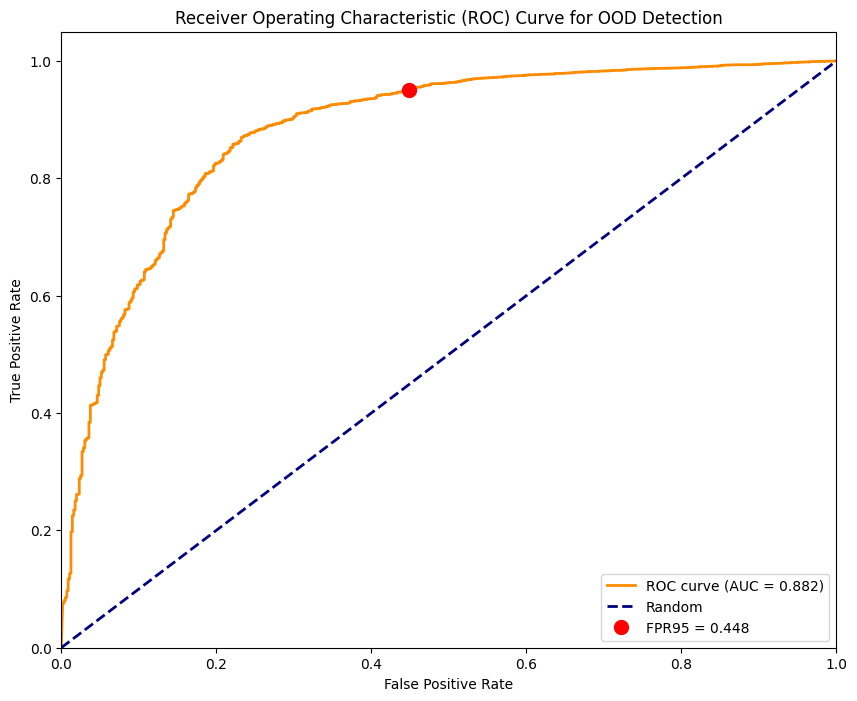

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_ood(scores, labels):
    # Ensure labels are binary (0 for OOD, 1 for ID)
    binary_labels = (labels == 1).astype(int)
    
    # Compute ROC curve points
    fpr, tpr, thresholds = roc_curve(binary_labels, scores)
    
    # Compute AUC
    roc_auc = auc(fpr, tpr)
    
    # Check if we need to invert the scores
    if roc_auc < 0.5:
        print("Original AUROC < 0.5, inverting scores...")
        fpr, tpr, thresholds = roc_curve(binary_labels, -scores)
        roc_auc = auc(fpr, tpr)
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    
    # Customize the plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for OOD Detection')
    
    # Add FPR95 point
    idx_tpr_95 = np.argmin(np.abs(tpr - 0.95))
    fpr95 = fpr[idx_tpr_95]
    plt.plot(fpr95, 0.95, 'ro', markersize=10, label=f'FPR95 = {fpr95:.3f}')
    
    plt.legend(loc="lower right")
    
    # Print some diagnostic information
    print(f"AUROC: {roc_auc:.3f}")
    print(f"FPR95: {fpr95:.3f}")
    print(f"Score range: {scores.min():.3f} to {scores.max():.3f}")
    print(f"Number of ID samples: {np.sum(labels == 1)}")
    print(f"Number of OOD samples: {np.sum(labels == -1)}")
    
    plt.show()


plot_roc_ood(scores, labels)

# FPR95, AUROC and OOD counts

In [1]:
# import torch 
# import numpy as np
# # build msp method (pass in pre-saved logits)
# def msp_postprocess(logits):
#     score = torch.softmax(logits, dim=1)
#     conf, pred = torch.max(score, dim=1)
#     return pred, conf
# def ebo_postprocess(logits, temperature=1):
#     score = torch.softmax(logits, dim=1)
#     _, pred = torch.max(score, dim=1)
#     conf = temperature * torch.logsumexp(logits / temperature,
#                                                 dim=1)
#     return pred, conf
# def maxlogits_postprocess(logits):
#     conf, pred = torch.max(logits, dim=1)
#     return pred, conf
# import numpy as np
# import torch
# import sklearn.covariance

# def mahalanobis_compute_mean(logits):
#     num_classes = logits[0].shape[0]
#     all_preds = np.array([logit.argmax(0) for logit in logits])
#     all_preds = torch.from_numpy(all_preds)
#     all_labels = all_preds
#     all_feats = torch.from_numpy(logits)
#     class_mean = []
#     centered_data = []
#     for c in range(num_classes):
#         class_samples = all_feats[all_labels.eq(c)].data
#         if class_samples.size(0) > 0:  # Check if there are samples for the class
#             mean = class_samples.mean(0)
#             centered = class_samples - mean.view(1, -1)
#         else:  # If no samples, use a placeholder (e.g., zeros)
#             feat_dim = all_feats.size(1)
#             mean = torch.zeros(feat_dim)
#             centered = torch.empty((0, feat_dim))  # Empty tensor with the correct second dimension
#         class_mean.append(mean)
#         centered_data.append(centered)

#     # Ensure there's at least one class with samples to avoid errors in covariance calculation
#     if len(torch.cat(centered_data)) == 0:
#         raise ValueError("No samples available for any class to compute covariance.")
    
#     group_lasso = sklearn.covariance.EmpiricalCovariance(assume_centered=False)
#     group_lasso.fit(torch.cat(centered_data).cpu().numpy().astype(np.float32))
#     precision = torch.from_numpy(group_lasso.precision_).float()
#     return class_mean, precision

# def mahalanobis_postprocess(logits, class_mean, precision):
#     num_classes = logits[0].shape[0]
#     pred = logits.argmax(1)
#     precision = precision.double()
#     class_scores = torch.zeros((logits.shape[0], num_classes))
#     for c in range(num_classes):
#         if class_mean[c].numel() > 0:  # Check if the class mean was computed
#             # Efficient computation of Mahalanobis distance for each sample
#             for i in range(logits.shape[0]):
#                 tensor = logits[i] - class_mean[c].double()
#                 # Here, we avoid the large matrix multiplication and directly compute the distance
#                 score = torch.dot(tensor, torch.matmul(precision, tensor))
#                 class_scores[i, c] = -score  # Negative score to match the original logic

#     conf = torch.max(class_scores, dim=1)[0]
#     return pred, conf
# import numpy as np
# import json
# import torch
# import gc
# from openood.evaluators.metrics import compute_all_metrics

# def process_and_evaluate(id, postprocess_method, dataset_names, modes=['train', 'val']):
#     results = dict()
#     results['id'] = dict()

#     # Load and process ID data
#     for mode in modes:
#         results['id'][mode] = dict()
#         logits_path = f"/home/hugo/yolov10FX/feats/{model_type}_{id}{scratch}/{id}-{mode}/logits.npy"
#         labels_path = f"/home/hugo/yolov10FX/feats/{model_type}_{id}{scratch}/{id}-{mode}/labels.npy"
#         results['id'][mode]['logits'] = np.load(logits_path, mmap_mode='r')
#         results['id'][mode]['labels'] = np.load(labels_path, mmap_mode='r')

#     results['ood'] = dict()

#     # Load and process OOD data
#     for dataset_name in dataset_names:
#         results['ood'][dataset_name] = dict()
#         logits_path = f'/home/hugo/yolov10FX/feats/{model_type}_{id}{scratch}/{dataset_name}/logits.npy'
#         results['ood'][dataset_name]['logits'] = np.load(logits_path, mmap_mode='r')
#         results['ood'][dataset_name]['labels'] = np.full((results['ood'][dataset_name]['logits'].shape[0], ), -1)

#     postprocess_results = dict()
#     postprocess_results['id'] = dict()

#     if postprocess_method == mahalanobis_postprocess:
#         class_mean, precision = mahalanobis_compute_mean(results['id']['train']['logits'])
#         del results['id']['train']
#         torch.cuda.empty_cache()
#         gc.collect()
#         pred, conf = postprocess_method(torch.from_numpy(results['id']['val']['logits']), class_mean, precision)
#     else:
#         pred, conf = postprocess_method(torch.from_numpy(results['id']['val']['logits']))

#     pred, conf = pred.numpy(), conf.numpy()
#     pred = np.full((pred.shape[0], ), 1)
#     gt = pred
#     postprocess_results['id']['val'] = [pred, conf, gt]

#     del results['id']
#     torch.cuda.empty_cache()
#     gc.collect()

#     postprocess_results['ood'] = dict()

#     for dataset_name in dataset_names:
#         if postprocess_method == mahalanobis_postprocess:
#             pred, conf = postprocess_method(torch.from_numpy(results['ood'][dataset_name]['logits']), class_mean, precision)
#         else:
#             pred, conf = postprocess_method(torch.from_numpy(results['ood'][dataset_name]['logits']))

#         pred, conf = pred.numpy(), conf.numpy()
#         pred = np.full((pred.shape[0], ), -1)
#         gt = pred
#         postprocess_results['ood'][dataset_name] = [pred, conf, gt]

#         del results['ood'][dataset_name]
#         torch.cuda.empty_cache()
#         gc.collect()

#     return eval_ood(postprocess_results, dataset_names)

# def eval_ood(postprocess_results, dataset_names):
#     [id_pred, id_conf, id_gt] = postprocess_results['id']['val']
#     metrics_list = []
#     fpr95 = []
#     auroc = []

#     for dataset_name in dataset_names:
#         [ood_pred, ood_conf, ood_gt] = postprocess_results['ood'][dataset_name]

#         pred = np.concatenate([id_pred, ood_pred])
#         conf = np.concatenate([id_conf, ood_conf])
#         label = np.concatenate([id_gt, ood_gt])

#         ood_metrics = compute_all_metrics(conf, label, pred)
#         fpr95.append(ood_metrics[0])
#         auroc.append(ood_metrics[1])
#         metrics_list.append(ood_metrics)

#     metrics_list = np.array(metrics_list)
#     metrics_mean = np.mean(metrics_list, axis=0)
#     fpr95.append(metrics_mean[0])
#     auroc.append(metrics_mean[1])

#     # return [round(fpr, 4) for fpr in fpr95], [round(auc, 4) for auc in auroc]
#     return [round(auc*100, 2) for auc in auroc]

# # Evaluation with BM
# import numpy as np
# import pickle
# import tqdm
# from utils.monitor_construction import features_clustering_by_k_start, monitor_construction_from_features
# from utils.evaluation import get_distance_dataset, compute_fpr95, get_distance_cls

# def load_pkl(file_path):
#     with open(file_path, 'rb') as f:
#         pkl_file = pickle.load(f)
#     return pkl_file

# def save_pkl(file_path, pkl_file):
#     with open(file_path, 'wb') as f:
#         pickle.dump(pkl_file, f)

# def npy2feats_dict(model_type, id, scratch, dataset_name):
#     logits = np.load(f"/home/hugo/yolov10FX/feats/{model_type}_{id}{scratch}/{dataset_name}/logits.npy")
#     labels = np.load(f"/home/hugo/yolov10FX/feats/{model_type}_{id}{scratch}/{dataset_name}/labels.npy")
#     feats_dict = dict()
#     for i in range(len(logits)):
#         label = labels[i]
#         if label not in feats_dict:
#             feats_dict[label] = []
#         feats_dict[label].append(logits[i])
#     for k,v in feats_dict.items():
#         feats_dict[k] = np.array(v)
#     return feats_dict

# import numpy as np
# from sklearn.metrics import roc_curve, auc

# def compute_ood_metrics(scores, labels):
#     # Ensure labels are binary (0 for OOD, 1 for ID)
#     binary_labels = (labels == 1).astype(int)
    
#     # Compute ROC curve points
#     fpr, tpr, thresholds = roc_curve(binary_labels, scores)
    
#     # Compute AUROC
#     auroc = auc(fpr, tpr)
    
#     # If AUROC < 0.5, invert the scores and recompute
#     if auroc < 0.5:
#         fpr, tpr, thresholds = roc_curve(binary_labels, -scores)
#         auroc = auc(fpr, tpr)
    
#     # Compute FPR95
#     idx_tpr_95 = np.argmin(np.abs(tpr - 0.95))
#     fpr95 = fpr[idx_tpr_95]
    
#     return fpr95, auroc

# def compute_fpr95(id, monitor_dict, model_type, scratch, distances_id, datasets):
#     fpr95_list = []
#     auroc_list = []
#     ood_counts = []
#     for dataset_name in datasets:
#         feats_ood = npy2feats_dict(model_type, id, scratch, dataset_name)
#         distances_dict = get_distance_dataset(monitor_dict, feats_ood)
#         distances_ood = [distance for k, v in distances_dict.items() for distance in v]
#         scores = np.concatenate([distances_id, distances_ood])*-1
#         labels = np.concatenate([np.ones(len(distances_id)), np.zeros(len(distances_ood))])
#         fpr95, auroc = compute_ood_metrics(scores, labels)
#         fpr95_list.append(fpr95)
#         auroc_list.append(auroc)
#         ood_counts.append(len(distances_ood))
#     mean_fpr95 = round(sum(fpr95_list) / len(fpr95_list), 2)
#     fpr95_list.append(mean_fpr95)
#     mean_auroc = round(sum(auroc_list) / len(auroc_list), 2)
#     auroc_list.append(mean_auroc)
#     return fpr95_list, auroc_list, ood_counts

# def main(id, density, model_type, scratch):
#     ood_datasets = ["ID-voc-OOD-coco", "OOD-open"] if id == "voc" else ["ID-bdd-OOD-coco", "OOD-open", "voc-ood"]
#     monitor_dict = {}
#     feats_dict = npy2feats_dict(model_type, id, scratch, f"{id}-train")
#     for k, v in tqdm.tqdm(feats_dict.items(), desc="category loop", leave=False):
#         if len(v) < density:
#             continue
#         k_start = round(len(v)/density)
#         clustering_results = features_clustering_by_k_start(v, k_start)
#         monitor_dict[k] = monitor_construction_from_features(v, clustering_results)
#     feats_id = npy2feats_dict(model_type, id, scratch, f"{id}-val")
#     distances_dict = get_distance_dataset(monitor_dict, feats_id)
#     distances_id = [distance for k, v in distances_dict.items() for distance in v]
    
#     fpr95_list = []
#     auroc_list = []
#     ood_counts = []
#     for dataset_name in ood_datasets:
#         feats_ood = npy2feats_dict(model_type, id, scratch, dataset_name)
#         distances_dict = get_distance_dataset(monitor_dict, feats_ood)
#         distances_ood = [distance for k, v in distances_dict.items() for distance in v]
#         scores = np.concatenate([distances_id, distances_ood])*-1
#         labels = np.concatenate([np.ones(len(distances_id)), np.zeros(len(distances_ood))])
#         fpr95, auroc = compute_ood_metrics(scores, labels)
#         fpr95_list.append(round(fpr95*100,2))
#         auroc_list.append(round(auroc*100,2))
#         ood_counts.append(len(distances_ood))
#     mean_fpr95 = round(sum(fpr95_list) / len(fpr95_list), 2)
#     fpr95_list.append(mean_fpr95)
#     mean_auroc = round(sum(auroc_list) / len(auroc_list), 2)
#     auroc_list.append(mean_auroc)
#     print("evalution using bam")
#     print(fpr95_list)
#     print(auroc_list)
#     print(ood_counts)
#     return auroc_list, ood_counts

# postprocess_dict = {"msp": msp_postprocess, "ebo": ebo_postprocess, "mls": maxlogits_postprocess, "mds": mahalanobis_postprocess}


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [11]:
import torch 
import numpy as np
# build msp method (pass in pre-saved logits)
def msp_postprocess(logits):
    score = torch.softmax(logits, dim=1)
    conf, pred = torch.max(score, dim=1)
    return pred, conf
def ebo_postprocess(logits, temperature=1):
    score = torch.softmax(logits, dim=1)
    _, pred = torch.max(score, dim=1)
    conf = temperature * torch.logsumexp(logits / temperature,
                                                dim=1)
    return pred, conf
def maxlogits_postprocess(logits):
    conf, pred = torch.max(logits, dim=1)
    return pred, conf
import numpy as np
import torch
import sklearn.covariance

def mahalanobis_compute_mean(logits):
    num_classes = logits[0].shape[0]
    all_preds = np.array([logit.argmax(0) for logit in logits])
    all_preds = torch.from_numpy(all_preds)
    all_labels = all_preds
    all_feats = torch.from_numpy(logits)
    class_mean = []
    centered_data = []
    for c in range(num_classes):
        class_samples = all_feats[all_labels.eq(c)].data
        if class_samples.size(0) > 0:  # Check if there are samples for the class
            mean = class_samples.mean(0)
            centered = class_samples - mean.view(1, -1)
        else:  # If no samples, use a placeholder (e.g., zeros)
            feat_dim = all_feats.size(1)
            mean = torch.zeros(feat_dim)
            centered = torch.empty((0, feat_dim))  # Empty tensor with the correct second dimension
        class_mean.append(mean)
        centered_data.append(centered)

    # Ensure there's at least one class with samples to avoid errors in covariance calculation
    if len(torch.cat(centered_data)) == 0:
        raise ValueError("No samples available for any class to compute covariance.")
    
    group_lasso = sklearn.covariance.EmpiricalCovariance(assume_centered=False)
    group_lasso.fit(torch.cat(centered_data).cpu().numpy().astype(np.float32))
    precision = torch.from_numpy(group_lasso.precision_).float()
    return class_mean, precision

def mahalanobis_postprocess(logits, class_mean, precision):
    num_classes = logits[0].shape[0]
    pred = logits.argmax(1)
    precision = precision.double()
    class_scores = torch.zeros((logits.shape[0], num_classes))
    for c in range(num_classes):
        if class_mean[c].numel() > 0:  # Check if the class mean was computed
            # Efficient computation of Mahalanobis distance for each sample
            for i in range(logits.shape[0]):
                tensor = logits[i] - class_mean[c].double()
                # Here, we avoid the large matrix multiplication and directly compute the distance
                score = torch.dot(tensor, torch.matmul(precision, tensor))
                class_scores[i, c] = -score  # Negative score to match the original logic

    conf = torch.max(class_scores, dim=1)[0]
    return pred, conf
import numpy as np
import json
import torch
import gc
from openood.evaluators.metrics import compute_all_metrics

def process_and_evaluate(id, postprocess_method, epoch, dataset_names, modes=['train', 'val']):
    results = dict()
    results['id'] = dict()

    # Load and process ID data
    for mode in modes:
        results['id'][mode] = dict()
        logits_path = f"/home/hugo/yolov10FX/feats/{model_type}_{id}_{epoch}/{id}-{mode}/logits.npy"
        labels_path = f"/home/hugo/yolov10FX/feats/{model_type}_{id}_{epoch}/{id}-{mode}/labels.npy"
        results['id'][mode]['logits'] = np.load(logits_path, mmap_mode='r')
        results['id'][mode]['labels'] = np.load(labels_path, mmap_mode='r')

    results['ood'] = dict()

    # Load and process OOD data
    for dataset_name in dataset_names:
        results['ood'][dataset_name] = dict()
        logits_path = f'/home/hugo/yolov10FX/feats/{model_type}_{id}_{epoch}/{dataset_name}/logits.npy'
        results['ood'][dataset_name]['logits'] = np.load(logits_path, mmap_mode='r')
        results['ood'][dataset_name]['labels'] = np.full((results['ood'][dataset_name]['logits'].shape[0], ), -1)

    postprocess_results = dict()
    postprocess_results['id'] = dict()

    if postprocess_method == mahalanobis_postprocess:
        class_mean, precision = mahalanobis_compute_mean(results['id']['train']['logits'])
        del results['id']['train']
        torch.cuda.empty_cache()
        gc.collect()
        pred, conf = postprocess_method(torch.from_numpy(results['id']['val']['logits']), class_mean, precision)
    else:
        pred, conf = postprocess_method(torch.from_numpy(results['id']['val']['logits']))

    pred, conf = pred.numpy(), conf.numpy()
    pred = np.full((pred.shape[0], ), 1)
    gt = pred
    postprocess_results['id']['val'] = [pred, conf, gt]

    del results['id']
    torch.cuda.empty_cache()
    gc.collect()

    postprocess_results['ood'] = dict()

    for dataset_name in dataset_names:
        if postprocess_method == mahalanobis_postprocess:
            pred, conf = postprocess_method(torch.from_numpy(results['ood'][dataset_name]['logits']), class_mean, precision)
        else:
            pred, conf = postprocess_method(torch.from_numpy(results['ood'][dataset_name]['logits']))

        pred, conf = pred.numpy(), conf.numpy()
        pred = np.full((pred.shape[0], ), -1)
        gt = pred
        postprocess_results['ood'][dataset_name] = [pred, conf, gt]

        del results['ood'][dataset_name]
        torch.cuda.empty_cache()
        gc.collect()

    return eval_ood(postprocess_results, dataset_names)

def eval_ood(postprocess_results, dataset_names):
    [id_pred, id_conf, id_gt] = postprocess_results['id']['val']
    metrics_list = []
    fpr95 = []
    auroc = []

    for dataset_name in dataset_names:
        [ood_pred, ood_conf, ood_gt] = postprocess_results['ood'][dataset_name]

        pred = np.concatenate([id_pred, ood_pred])
        conf = np.concatenate([id_conf, ood_conf])
        label = np.concatenate([id_gt, ood_gt])

        ood_metrics = compute_all_metrics(conf, label, pred)
        fpr95.append(ood_metrics[0])
        auroc.append(ood_metrics[1])
        metrics_list.append(ood_metrics)

    metrics_list = np.array(metrics_list)
    metrics_mean = np.mean(metrics_list, axis=0)
    fpr95.append(metrics_mean[0])
    auroc.append(metrics_mean[1])

    # return [round(fpr, 4) for fpr in fpr95], [round(auc, 4) for auc in auroc]
    return [round(fpr*100, 2) for fpr in fpr95],[round(auc*100, 2) for auc in auroc]

# Evaluation with BM
import numpy as np
import pickle
import tqdm
from utils.monitor_construction import features_clustering_by_k_start, monitor_construction_from_features
from utils.evaluation import get_distance_dataset, compute_fpr95, get_distance_cls

def load_pkl(file_path):
    with open(file_path, 'rb') as f:
        pkl_file = pickle.load(f)
    return pkl_file

def save_pkl(file_path, pkl_file):
    with open(file_path, 'wb') as f:
        pickle.dump(pkl_file, f)

def npy2feats_dict(model_type, id, epoch, dataset_name):
    logits = np.load(f"/home/hugo/yolov10FX/feats/{model_type}_{id}_{epoch}/{dataset_name}/logits.npy")
    labels = np.load(f"/home/hugo/yolov10FX/feats/{model_type}_{id}_{epoch}/{dataset_name}/labels.npy")
    feats_dict = dict()
    for i in range(len(logits)):
        label = labels[i]
        if label not in feats_dict:
            feats_dict[label] = []
        feats_dict[label].append(logits[i])
    for k,v in feats_dict.items():
        feats_dict[k] = np.array(v)
    return feats_dict

import numpy as np
from sklearn.metrics import roc_curve, auc

def compute_ood_metrics(scores, labels):
    # Ensure labels are binary (0 for OOD, 1 for ID)
    binary_labels = (labels == 1).astype(int)
    
    # Compute ROC curve points
    fpr, tpr, thresholds = roc_curve(binary_labels, scores)
    
    # Compute AUROC
    auroc = auc(fpr, tpr)
    
    # If AUROC < 0.5, invert the scores and recompute
    if auroc < 0.5:
        fpr, tpr, thresholds = roc_curve(binary_labels, -scores)
        auroc = auc(fpr, tpr)
    
    # Compute FPR95
    idx_tpr_95 = np.argmin(np.abs(tpr - 0.95))
    fpr95 = fpr[idx_tpr_95]
    
    return fpr95, auroc

def compute_fpr95(id, monitor_dict, model_type, epoch, distances_id, datasets):
    fpr95_list = []
    auroc_list = []
    ood_counts = []
    for dataset_name in datasets:
        feats_ood = npy2feats_dict(model_type, id, epoch, dataset_name)
        distances_dict = get_distance_dataset(monitor_dict, feats_ood)
        distances_ood = [distance for k, v in distances_dict.items() for distance in v]
        scores = np.concatenate([distances_id, distances_ood])*-1
        labels = np.concatenate([np.ones(len(distances_id)), np.zeros(len(distances_ood))])
        fpr95, auroc = compute_ood_metrics(scores, labels)
        fpr95_list.append(fpr95)
        auroc_list.append(auroc)
        ood_counts.append(len(distances_ood))
    mean_fpr95 = round(sum(fpr95_list) / len(fpr95_list), 2)
    fpr95_list.append(mean_fpr95)
    mean_auroc = round(sum(auroc_list) / len(auroc_list), 2)
    auroc_list.append(mean_auroc)
    return fpr95_list, auroc_list, ood_counts

def main(id, density, model_type, epoch):
    ood_datasets = ["ID-voc-OOD-coco", "OOD-open"] if id == "voc" else ["ID-bdd-OOD-coco", "OOD-open", "voc-ood"]
    monitor_dict = {}
    feats_dict = npy2feats_dict(model_type, id, epoch, f"{id}-train")
    for k, v in tqdm.tqdm(feats_dict.items(), desc="category loop", leave=False):
        if len(v) < density:
            continue
        k_start = round(len(v)/density)
        clustering_results = features_clustering_by_k_start(v, k_start)
        monitor_dict[k] = monitor_construction_from_features(v, clustering_results)
    feats_id = npy2feats_dict(model_type, id, epoch, f"{id}-val")
    distances_dict = get_distance_dataset(monitor_dict, feats_id)
    distances_id = [distance for k, v in distances_dict.items() for distance in v]
    
    fpr95_list = []
    auroc_list = []
    ood_counts = []
    for dataset_name in ood_datasets:
        feats_ood = npy2feats_dict(model_type, id, epoch, dataset_name)
        distances_dict = get_distance_dataset(monitor_dict, feats_ood)
        distances_ood = [distance for k, v in distances_dict.items() for distance in v]
        scores = np.concatenate([distances_id, distances_ood])*-1
        labels = np.concatenate([np.ones(len(distances_id)), np.zeros(len(distances_ood))])
        fpr95, auroc = compute_ood_metrics(scores, labels)
        fpr95_list.append(round(fpr95*100,2))
        auroc_list.append(round(auroc*100,2))
        ood_counts.append(len(distances_ood))
    mean_fpr95 = round(sum(fpr95_list) / len(fpr95_list), 2)
    fpr95_list.append(mean_fpr95)
    mean_auroc = round(sum(auroc_list) / len(auroc_list), 2)
    auroc_list.append(mean_auroc)
    print("evalution using bam")
    print(fpr95_list)
    print(auroc_list)
    print(ood_counts)
    return fpr95_list, auroc_list, ood_counts

postprocess_dict = {"msp": msp_postprocess, "ebo": ebo_postprocess, "mls": maxlogits_postprocess, "mds": mahalanobis_postprocess}


In [12]:
postprocess_dict = {"msp": msp_postprocess, "ebo": ebo_postprocess, "mls": maxlogits_postprocess, "mds": mahalanobis_postprocess}
id, scratch = "voc", ""
model_type = "v10l"
ood_datasets = ["ID-voc-OOD-coco", "OOD-open"] if id == "voc" else ["ID-bdd-OOD-coco", "OOD-open", "voc-ood"]
fpr95_dict = dict()
auroc_dict = dict()
epoch = 50
print(f"evaluation on {id}-{model_type}_{epoch} model")
for k,v in postprocess_dict.items():
    print(f"evalution using {k}")
    fpr95_list, auroc_list = process_and_evaluate(id, v, epoch, dataset_names=ood_datasets)
    fpr95_dict[k] = fpr95_list
    auroc_dict[k] = auroc_list
fpr95_list, auroc_list, ood_counts = main(id, 50, model_type, epoch)
fpr95_dict["bam"] = fpr95_list
auroc_dict["bam"] = auroc_list
print("FPR95: ", fpr95_dict)
print("AUROC: ", auroc_dict)
print("OOD counts: ", ood_counts)

evaluation on voc-v10l_50 model
evalution using msp
evalution using ebo
evalution using mls
evalution using mds


evalution using bam
[54.66, 66.61, 60.64]
[80.4, 72.68, 76.54]
[483, 1162]
FPR95:  {'msp': [67.68, 90.13, 78.9], 'ebo': [76.55, 80.64, 78.59], 'mls': [76.55, 80.64, 78.59], 'mds': [55.4, 78.9, 67.15], 'bam': [54.66, 66.61, 60.64]}
AUROC:  {'msp': [86.09, 76.54, 81.32], 'ebo': [69.11, 63.72, 66.41], 'mls': [69.85, 64.23, 67.04], 'mds': [87.03, 78.36, 82.69], 'bam': [80.4, 72.68, 76.54]}
OOD counts:  [483, 1162]


In [13]:
postprocess_dict = {"msp": msp_postprocess, "ebo": ebo_postprocess, "mls": maxlogits_postprocess, "mds": mahalanobis_postprocess}
id, scratch = "voc", ""
model_type = "v10l"
ood_datasets = ["ID-voc-OOD-coco", "OOD-open"] if id == "voc" else ["ID-bdd-OOD-coco", "OOD-open", "voc-ood"]
fpr95_dict = dict()
auroc_dict = dict()
epoch = 100
print(f"evaluation on {id}-{model_type}_{epoch} model")
for k,v in postprocess_dict.items():
    print(f"evalution using {k}")
    fpr95_list, auroc_list = process_and_evaluate(id, v, epoch, dataset_names=ood_datasets)
    fpr95_dict[k] = fpr95_list
    auroc_dict[k] = auroc_list
fpr95_list, auroc_list, ood_counts = main(id, 50, model_type, epoch)
fpr95_dict["bam"] = fpr95_list
auroc_dict["bam"] = auroc_list
print("FPR95: ", fpr95_dict)
print("AUROC: ", auroc_dict)
print("OOD counts: ", ood_counts)

evaluation on voc-v10l_100 model
evalution using msp
evalution using ebo
evalution using mls
evalution using mds


evalution using bam
[50.21, 54.87, 52.54]
[83.43, 79.22, 81.32]
[486, 1252]
FPR95:  {'msp': [66.8, 81.36, 74.08], 'ebo': [80.33, 82.82, 81.57], 'mls': [80.33, 82.82, 81.57], 'mds': [59.09, 82.78, 70.94], 'bam': [50.21, 54.87, 52.54]}
AUROC:  {'msp': [85.27, 74.56, 79.92], 'ebo': [66.42, 61.65, 64.03], 'mls': [66.9, 61.94, 64.42], 'mds': [85.77, 78.52, 82.15], 'bam': [83.43, 79.22, 81.32]}
OOD counts:  [486, 1252]


In [14]:
postprocess_dict = {"msp": msp_postprocess, "ebo": ebo_postprocess, "mls": maxlogits_postprocess, "mds": mahalanobis_postprocess}
id, scratch = "voc", ""
model_type = "v10l"
ood_datasets = ["ID-voc-OOD-coco", "OOD-open"] if id == "voc" else ["ID-bdd-OOD-coco", "OOD-open", "voc-ood"]
fpr95_dict = dict()
auroc_dict = dict()
epoch = 150
print(f"evaluation on {id}-{model_type}_{epoch} model")
for k,v in postprocess_dict.items():
    print(f"evalution using {k}")
    fpr95_list, auroc_list = process_and_evaluate(id, v, epoch, dataset_names=ood_datasets)
    fpr95_dict[k] = fpr95_list
    auroc_dict[k] = auroc_list
fpr95_list, auroc_list, ood_counts = main(id, 50, model_type, epoch)
fpr95_dict["bam"] = fpr95_list
auroc_dict["bam"] = auroc_list
print("FPR95: ", fpr95_dict)
print("AUROC: ", auroc_dict)
print("OOD counts: ", ood_counts)

evaluation on voc-v10l_150 model
evalution using msp
evalution using ebo
evalution using mls
evalution using mds


evalution using bam
[46.76, 50.04, 48.4]
[84.86, 81.74, 83.3]
[586, 1329]
FPR95:  {'msp': [50.7, 69.4, 60.05], 'ebo': [78.03, 82.95, 80.49], 'mls': [78.03, 82.94, 80.49], 'mds': [49.42, 77.95, 63.68], 'bam': [46.76, 50.04, 48.4]}
AUROC:  {'msp': [87.36, 80.2, 83.78], 'ebo': [66.6, 62.75, 64.68], 'mls': [67.35, 63.31, 65.33], 'mds': [87.34, 81.11, 84.23], 'bam': [84.86, 81.74, 83.3]}
OOD counts:  [586, 1329]


In [2]:
postprocess_dict = {"msp": msp_postprocess, "ebo": ebo_postprocess, "mls": maxlogits_postprocess, "mds": mahalanobis_postprocess}
id, scratch = "voc", "_scratch"
ood_datasets = ["ID-voc-OOD-coco", "OOD-open"] if id == "voc" else ["ID-bdd-OOD-coco", "OOD-open", "voc-ood"]
for model_type in ["v10s"]:
    print(f"evaluation on {id}-{model_type}{scratch} model")
    for k,v in postprocess_dict.items():
        print(f"evalution using {k}")
        print(process_and_evaluate(id, v, dataset_names=ood_datasets))
    main(id, 5, model_type, epoch)

evaluation on bdd-v10s_scratch model
evalution using msp


/tmp/ipykernel_29533/914387879.py:103: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  pred, conf = postprocess_method(torch.from_numpy(results['id']['val']['logits']))


[79.65, 82.19, 77.51, 79.78]
evalution using ebo
[70.07, 68.61, 68.48, 69.05]
evalution using mls
[71.12, 69.99, 69.15, 70.09]
evalution using mds
[80.64, 81.88, 76.08, 79.53]


evalution using bam
[70.54, 64.67, 74.75, 69.99]
[68.97, 72.55, 66.88, 69.47]
[1290, 702, 1299]


In [2]:
import plotly.graph_objects as go

# Data
epochs = [50, 100, 150]
coco_ood = [483, 486, 586]
open_ood = [1162, 1252, 1329]

# Create figure
fig = go.Figure()

# Add bars for coco-ood
fig.add_trace(go.Bar(
    x=epochs,
    y=coco_ood,
    name='coco-ood',
    marker_color='rgb(55, 83, 109)'
))

# Add bars for open-ood
fig.add_trace(go.Bar(
    x=epochs,
    y=open_ood,
    name='open-ood',
    marker_color='rgb(26, 118, 255)'
))

# Update layout
fig.update_layout(
    title='OOD Counts Comparison for Different Epochs',
    xaxis_title='Epochs',
    yaxis_title='OOD Count',
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    legend=dict(x=0.01, y=0.99, bgcolor='rgba(255, 255, 255, 0)', bordercolor='rgba(255, 255, 255, 0)'),
    height=500,
    width=700
)

# Show the plot
fig.show()

In [6]:
import plotly.graph_objects as go

# Data Preparation
epochs = [50, 100, 150]

fpr95_data = {
    "MSP": [78.90, 74.08, 60.05],
    "EBO": [78.59, 81.57, 80.49],
    "MLS": [78.59, 81.57, 80.49],
    "MDS": [67.15, 70.94, 63.68],
    "BAM": [60.64, 52.54, 48.40]
}

auroc_data = {
    "MSP": [81.32, 79.92, 83.78],
    "EBO": [66.41, 64.03, 64.68],
    "MLS": [67.04, 64.42, 65.33],
    "MDS": [82.69, 82.15, 84.23],
    "BAM": [76.54, 81.32, 83.30]
}

# FPR95 Plot
fig_fpr95 = go.Figure()
for method, scores in fpr95_data.items():
    fig_fpr95.add_trace(go.Scatter(x=epochs, y=scores, mode='lines+markers', name=method))

fig_fpr95.update_layout(
    title='FPR95 over Epochs',
    xaxis_title='Epochs',
    yaxis_title='FPR95',
    height=500,
    width=700
)

# AUROC Plot
fig_auroc = go.Figure()
for method, scores in auroc_data.items():
    fig_auroc.add_trace(go.Scatter(x=epochs, y=scores, mode='lines+markers', name=method))

fig_auroc.update_layout(
    title='AUROC over Epochs',
    xaxis_title='Epochs',
    yaxis_title='AUROC',
    height=500,
    width=700
)

# Show the plots
fig_fpr95.show()
fig_auroc.show()

In [6]:
import json
def read_json(file):
    with open(file) as json_file:
        data = json.load(json_file)
    return data
# # Open the JSON file
# with open('/home/hugo/yolov10FX/feats/v10l_voc_100/ID-voc-OOD-coco/predictions.json') as json_file:
#     data = json.load(json_file)


In [3]:
data[0]

{'image_id': 285,
 'category_id': 11,
 'bbox': [0.0, 71.081, 585.231, 568.619],
 'score': 0.97392,
 'logits': [-12.670259475708008,
  -12.518778800964355,
  -11.892232894897461,
  -17.768692016601562,
  -11.712837219238281,
  -15.039383888244629,
  -11.747076034545898,
  -11.280284881591797,
  -10.764399528503418,
  -10.40135383605957,
  -12.621373176574707,
  3.6200952529907227,
  -11.142387390136719,
  -12.675107955932617,
  -11.615619659423828,
  -12.645925521850586,
  -10.050628662109375,
  -12.486255645751953,
  -13.744357109069824,
  -12.75501823425293]}

In [6]:
import spacy

nlp = spacy.load("en_core_web_lg")
tokens = nlp("dog cat banana afskfsd")

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

/home/hugo/miniconda3/envs/yolov10/lib/python3.9/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_lg' (3.5.0) was trained with spaCy v3.5.0 and may not be 100% compatible with the current version (3.7.5). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


dog True 75.254234 False
cat True 63.188496 False
banana True 31.620354 False
afskfsd False 0.0 True


In [2]:
import yaml

def extract_classes(yaml_file):
    with open(yaml_file, 'r') as file:
        data = yaml.safe_load(file)
    
    if 'names' in data:
        return {int(k): v for k, v in data['names'].items()}
    else:
        return None

In [3]:
import spacy
import numpy as np
import plotly.graph_objects as go

# Load SpaCy model
nlp = spacy.load("en_core_web_lg")

def similarity_heatmap(dataset1, dataset2):
    coco_file = f'/home/hugo/datasets/{dataset1}/dataset.yaml'
    coco_dict = extract_classes(coco_file)

    voc_file = f'/home/hugo/datasets/{dataset2}/dataset.yaml'
    voc_dict = extract_classes(voc_file)

    # Extract class labels
    voc_classes = list(voc_dict.values())
    coco_classes = list(coco_dict.values())

    # Initialize similarity matrix
    similarity_matrix = np.zeros((len(voc_classes), len(coco_classes)))

    # Compute similarity
    for i, voc_class in enumerate(voc_classes):
        doc1 = nlp(voc_class)
        for j, bdd_class in enumerate(coco_classes):
            doc2 = nlp(bdd_class)
            similarity_matrix[i, j] = doc1.similarity(doc2)

    # Plot similarity matrix using Plotly
    fig = go.Figure(data=go.Heatmap(
        z=similarity_matrix,
        x=coco_classes,
        y=voc_classes,
        colorscale='Viridis'
    ))

    fig.update_layout(
        title=f'Class Label Similarity between {dataset1.upper()} and {dataset2.upper()} Datasets',
        xaxis_nticks=36
    )

    fig.show()

In [ ]:
similarity_heatmap("ID-voc-OOD-coco", "voc")

In [4]:
similarity_heatmap("ID-voc-OOD-coco", "voc")

/tmp/ipykernel_11747/2542536621.py:27: UserWarning:

[W008] Evaluating Doc.similarity based on empty vectors.



In [12]:
similarity_heatmap("ID-bdd-OOD-coco", "bdd")

In [4]:
similarity_heatmap("bdd", "voc")

/tmp/ipykernel_7717/2542536621.py:27: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity_matrix[i, j] = doc1.similarity(doc2)


In [13]:
import json
from pathlib import Path

# Load COCO JSON file
coco_file_path = '/home/hugo/datasets/OpenImages/ood_classes_rm_overlap/COCO-Format/val_coco_format.json'
with open(coco_file_path, 'r') as f:
    coco_data = json.load(f)

# Extract category information
categories = {cat['id']: cat['name'] for cat in coco_data['categories']}
print("Categories in JSON file:", categories)

# Find categories that have annotations
annotated_category_ids = {ann['category_id'] for ann in coco_data['annotations']}
print("Annotated Category IDs:", annotated_category_ids)

# Filter out categories that are not annotated
annotated_categories = {cat_id: categories[cat_id] for cat_id in annotated_category_ids}
print("Annotated Categories:", annotated_categories)

# Generate names dictionary
names = {i: name for i, (cat_id, name) in enumerate(annotated_categories.items())}
print("YOLO Names dictionary:", names)

# Define the paths
dataset_path = '/home/hugo/datasets/OOD-open'
train_images_path = '/home/hugo/datasets/OOD-open/images/val'
val_images_path = '/home/hugo/datasets/OOD-open/images/val'

# Create the dataset.yaml content
dataset_yaml_content = {
    'names': names,
    'path': dataset_path,
    'train': train_images_path,
    'val': val_images_path,
}

# Save the dataset.yaml file
output_yaml_path = Path(dataset_path) / 'dataset.yaml'
with open(output_yaml_path, 'w') as yaml_file:
    yaml.dump(dataset_yaml_content, yaml_file, default_flow_style=False)

print(f'Dataset YAML file saved to {output_yaml_path}')

Categories in JSON file: {1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 12: 'stop sign', 13: 'parking meter', 14: 'bench', 15: 'bird', 16: 'cat', 17: 'dog', 18: 'horse', 19: 'sheep', 20: 'cow', 21: 'elephant', 22: 'bear', 23: 'zebra', 24: 'giraffe', 25: 'backpack', 26: 'umbrella', 27: 'handbag', 28: 'tie', 29: 'suitcase', 30: 'frisbee', 31: 'skis', 32: 'snowboard', 33: 'sports ball', 34: 'kite', 35: 'baseball bat', 36: 'baseball glove', 37: 'skateboard', 38: 'surfboard', 39: 'tennis racket', 40: 'bottle', 41: 'wine glass', 42: 'cup', 43: 'fork', 44: 'knife', 45: 'spoon', 46: 'bowl', 47: 'banana', 48: 'apple', 49: 'sandwich', 50: 'orange', 51: 'broccoli', 52: 'carrot', 53: 'hot dog', 54: 'pizza', 55: 'donut', 56: 'cake', 57: 'chair', 58: 'couch', 59: 'potted plant', 60: 'bed', 61: 'dining table', 62: 'toilet', 63: 'tv', 64: 'laptop', 65: 'mouse', 66: 'remote', 67: 'keyboard', 68:

In [14]:
coco_data.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

In [15]:
coco_data["annotations"]

[]

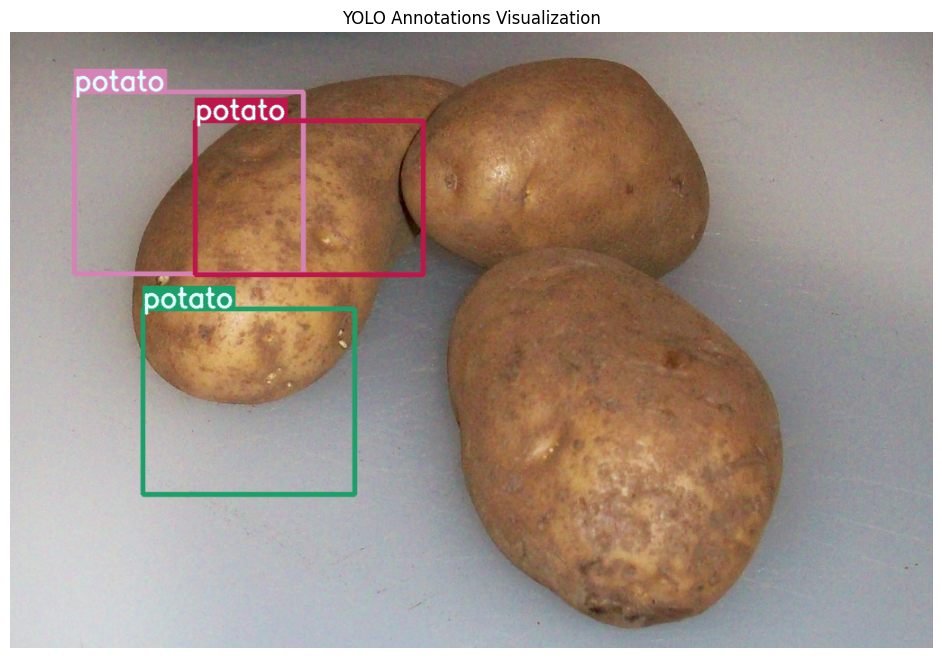

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def plot_one_box(x, img, color=None, label=None, line_thickness=None):
    # Plots one bounding box on image img
    tl = line_thickness or round(0.002 * (img.shape[0] + img.shape[1]) / 2) + 1  # line/font thickness
    color = color or [np.random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(img, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(img, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(img, label, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)

def visualize_yolo_annotations(image_path, annotations, class_names):
    # Read image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Get image dimensions
    height, width, _ = img.shape
    
    # Plot each bounding box
    for annotation in annotations:
        class_id, x_center, y_center, box_width, box_height = map(float, annotation.split())
        
        # Convert relative coordinates to absolute pixel coordinates
        x_min = int((x_center - box_width / 2) * width)
        y_min = int((y_center - box_height / 2) * height)
        x_max = int((x_center + box_width / 2) * width)
        y_max = int((y_center + box_height / 2) * height)
        
        class_name = class_names[int(class_id)]
        plot_one_box([x_min, y_min, x_max, y_max], img, label=class_name)
    
    # Display the image
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title('YOLO Annotations Visualization')
    plt.show()

# Example usage
image_path = '/home/hugo/datasets/OpenImages/ood_classes_rm_overlap/images/9fe983a5e5c8de75.jpg'  # Replace with your actual image path
class_names = ['potato']  # Add more class names if needed

annotations = [
    "0 0.194 0.245 0.248 0.296",
    "0 0.324 0.269 0.247 0.25",
    "0 0.259 0.6 0.229 0.3"
]

visualize_yolo_annotations(image_path, annotations, class_names)

In [15]:
import numpy as np
labels_open_voc = np.load("/home/hugo/yolov10FX/feats/v10s_voc/OOD-open/labels.npy")
labels_open_voc[:4]

array([ 4,  6,  2, 11], dtype=int32)

In [18]:
import numpy as np
import plotly.graph_objects as go

# Load the data
labels_open_voc = np.load("/home/hugo/yolov10FX/feats/v10s_voc/OOD-open/labels.npy")

# Define class names
class_names = [
    "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat",
    "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person",
    "pottedplant", "sheep", "sofa", "train", "tvmonitor"
]

# Count occurrences of each label
unique, counts = np.unique(labels_open_voc, return_counts=True)
label_counts = dict(zip(unique, counts))

# Prepare data for plotting
labels = [class_names[i] for i in range(len(class_names))]
values = [label_counts.get(i, 0) for i in range(len(class_names))]

# Create bar plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=labels,
    y=values,
    text=values,
    textposition='auto',
)])

# Update layout
fig.update_layout(
    title="OOD counts per class in OpenImages dataset (ID:VOC)",
    xaxis_title="Class Names",
    yaxis_title="Count",
    xaxis_tickangle=-45,
    height=600,
    width=1000
)

# Show the plot
fig.show()

# Print the counts
for label, count in zip(labels, values):
    print(f"{label}: {count}")

aeroplane: 0
bicycle: 3
bird: 452
boat: 10
bottle: 192
bus: 0
car: 20
cat: 160
chair: 15
cow: 63
diningtable: 0
dog: 215
horse: 42
motorbike: 0
person: 169
pottedplant: 0
sheep: 47
sofa: 0
train: 0
tvmonitor: 0


In [20]:
import numpy as np
import plotly.graph_objects as go

# Load the data
labels_open_voc = np.load("/home/hugo/yolov10FX/feats/v10s_voc/ID-voc-OOD-coco/labels.npy")

# Define class names
class_names = [
    "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat",
    "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person",
    "pottedplant", "sheep", "sofa", "train", "tvmonitor"
]

# Count occurrences of each label
unique, counts = np.unique(labels_open_voc, return_counts=True)
label_counts = dict(zip(unique, counts))

# Prepare data for plotting
labels = [class_names[i] for i in range(len(class_names))]
values = [label_counts.get(i, 0) for i in range(len(class_names))]

# Create bar plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=labels,
    y=values,
    text=values,
    textposition='auto',
)])

# Update layout
fig.update_layout(
    title="OOD counts per class in COCO dataset (ID:VOC)",
    xaxis_title="Class Names",
    yaxis_title="Count",
    xaxis_tickangle=-45,
    height=600,
    width=1000
)

# Show the plot
fig.show()


In [1]:
import fiftyone as fo
fo.list_datasets()

['ID-bdd-OOD-coco',
 'ID-voc-OOD-coco',
 'OOD-open',
 'bdd',
 'bdd-train',
 'bdd-val',
 'voc-ood',
 'voc-train',
 'voc-val']

In [4]:
from ultralytics import YOLO
# YOLOv8
model = YOLO("yolov8m.pt")
dataset = fo.load_dataset("ID-voc-OOD-coco")
# model = YOLO("yolov8m.pt")
# model = YOLO("yolov8l.pt")
# model = YOLO("yolov8x.pt")

# YOLOv5
# model = YOLO("yolov5s.pt")
# model = YOLO("yolov5m.pt")
# model = YOLO("yolov5l.pt")
# model = YOLO("yolov5x.pt")

# YOLOv9
# model = YOLO("yolov9c.pt")
# model = YOLO("yolov9e.pt")

dataset.apply_model(model, label_field="annotation-v8m")

session = fo.launch_app(dataset)

 100% |█████████████████| 930/930 [19.9s elapsed, 0s remaining, 46.6 samples/s]      
